# Лабораторна робота №4 з глибинного навчання студента групи Ім-17 Бєлінського Андрія

In [3]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [117]:
#  функція активації Z-елементів
def g_Z(U_inp, k1, U_n):
    ret_Z = U_inp.copy()
    
    ret_Z[U_inp <= 0] = 0
    ret_Z[(U_inp > 0) & (U_inp <= U_n)] = k1 * U_inp[(U_inp > 0) & (U_inp <= U_n)]    
    ret_Z[U_inp > U_n] = U_n 

    return ret_Z

# функкція активації А-нейронів
def g_A(Z_inp): 
    ret_A = Z_inp.copy()
    ret_A[Z_inp > 0] = Z_inp[Z_inp > 0]
    ret_A[Z_inp <= 0] = 0
    
    return ret_A

### У якості еталонних значень виступають наступні літери: E, N, A, D, L, K

In [207]:
V = np.array([
    [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1], 
    [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1],
    [-1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1],
    [1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1],
    [1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1],
    [1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1]
])

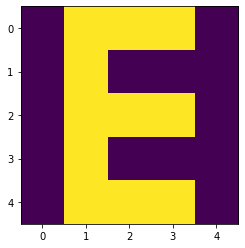

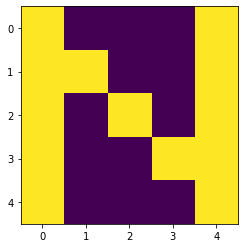

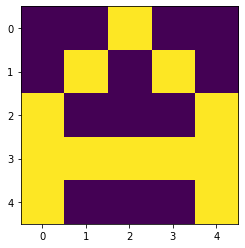

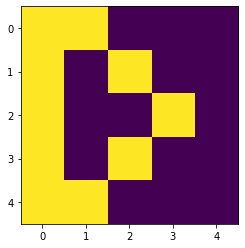

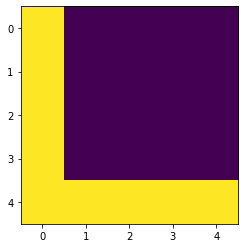

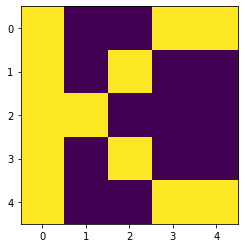

In [208]:
for i in range(V.shape[0]):
    plt.imshow(V[i].reshape((5, 5)), interpolation='nearest')
    plt.show()

### Зображення, що ми пред'являємо

In [209]:
S = np.array([
    [-1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1],
    [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1],
    [-1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1],
    [1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1]
])

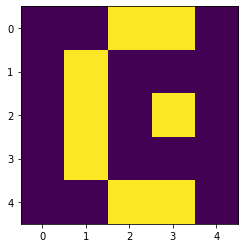

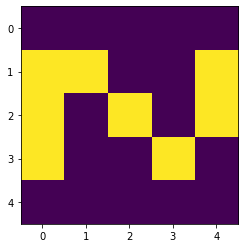

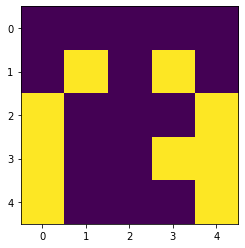

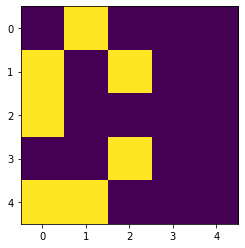

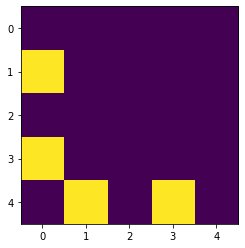

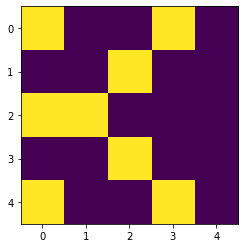

In [210]:
for i in range(S.shape[0]):
    plt.imshow(S[i].reshape((5, 5)), interpolation='nearest')
    plt.show()

### Знаючи кількість еталонних зображень та їх розмірність, визначемо матрицю вагових коефіцієнтів нижньої підмережі мережі Хемінга

In [211]:
n, m = V.shape[0], V.shape[1]
w = V.T/2
w

array([[-0.5,  0.5, -0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5, -0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5,  0.5, -0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5, -0.5, -0.5,  0.5],
       [-0.5,  0.5, -0.5, -0.5, -0.5,  0.5],
       [-0.5,  0.5, -0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5,  0.5, -0.5,  0.5],
       [-0.5, -0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5, -0.5, -0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5, -0.5,  0.5,  0.5, -0.5,  0.5],
       [-0.5,  0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5, -0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5, -0.5,  0.5,  0.5, -0.5],
       [ 0

### Розраховуємо зміщення Z-нейронів

In [212]:
b = np.empty(n)
b.fill(m/2)
b

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5])

### Визначемо додаткові параметри мережі

In [213]:
k1 = 0.05
Un = 1/k1
e = 1/n 
k1, Un, e

(0.05, 20.0, 0.16666666666666666)

In [214]:
w.shape

(25, 6)

### Знаючи усі необхідні параметри, розглянемо її функціонування при поданні нееталонних зображень

### Нагадаємо, що еталонними в нас є: 
 - E з індексом 0 
 - N з індексом 1 
 - A з індексом 2
 - D з індексом 3
 - L з індексом 4
 - K з індексом 5 

### Оберемо, наприклад, нееталонне зображення з індексом 5. Це зображення має співставлятися з конкретним еталонним. У даному прикладі максимум має припадати на еталонну літеру K 

In [234]:
img_idx = 5 # індекс нееталонного зображення для розпізнавання

### Намагаємось розпізнаємо

In [235]:
num_it = 10

U_to_Z = b + (S[img_idx] @ w)
U_out_A = g_Z(U_inp=U_to_Z, k1=k1, U_n=Un)

for t in range(num_it):
    summation_arr = np.tile(U_out_A, (n, 1))
    np.fill_diagonal(summation_arr, 0)
    summation_arr = np.sum(summation_arr, axis=1)

    U_out_A = g_A(U_out_A - e * summation_arr)

In [236]:
U_out_A

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , 19.45])

In [237]:
prediction = np.argmax(U_out_A)
print("Нееталоне зображення відповідає еталонному під індексом " + str(prediction))

Нееталоне зображення відповідає еталонному під індексом 5


### Як можна бачити, найбільше значення відповідає тому еталонному, яке ми хотіли отримати.